#### Caso:


**Se tiene un fichero csv con información relativa a datos de un estudio realizado
en la zona de Boston, donde se analizan diferentes variables, como son el
índice de crimen, el número de habitaciones, el porcentaje de habitantes de
clase baja y el valor medio de las casas de esa zona.**

#### 1.- Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2.- Leer csv correspondiente.

In [40]:
df_housing = pd.read_csv('HousingData.csv')
df_housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### 3.- Renombrar campos.

In [46]:
rename_values = {
    "CRIM":"crime_rate",
    "ZN":"prop_residential_land",
    "INDUS":"prop_non_retail_busin",
    "CHAS":"charles_river_dummy_variable",
    "NOX":"nitric_oxides_concentration",
    "RM":"avg_number_rooms_per_dwelling",
    "AGE":"prop_owner_occupies_units_built_prior_1940",
    "DIS":"weighted_distances_to_five_boston_employement_centres",
    "RAD":"index_accessibility_to_radial_highways",
    "TAX":"full_value_property_tax_rate_per_10000",
    "PTRATIO":"pupil_teacher_ratio_by_town",
    "B":"1000(Bk-0.63)^2",
    "LSTAT":"percent_lower_status_of_the_population",
    "MEDV":"media_n_value_of_owner_occupied_homes_in_thousands"
}

for i in df_housing:
    df_housing = df_housing.rename(columns={i: rename_values[i]})

#### 4.- Confeccionar los siguientes Gráficos

- Histograma: Un histograma es útil para ver la distribución de una variable, es decir, nos permite ver los valores más comunes. Para el caso que se presenta se desea ver la distribución de la cantidad media de habitaciones en el estudio realizado.

<AxesSubplot: >

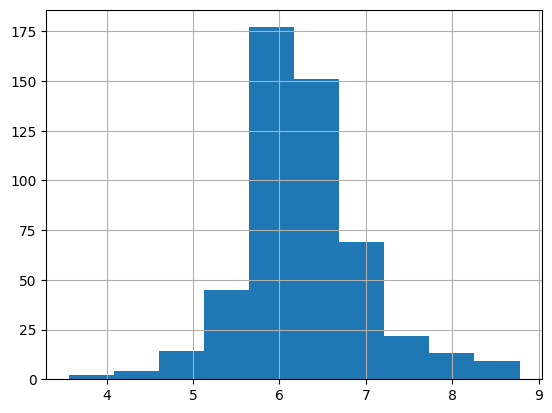

In [28]:
df_housing.avg_number_rooms_per_dwelling.hist()

- Dispersión: sirve para representar la relación entre dos variables.
Para nuestro caso se desea ver la relación entre índice de crimen
y el valor mediano de las casas. En otras palabras, ¿el índice de
crimen afecta el valor medio de las casas?

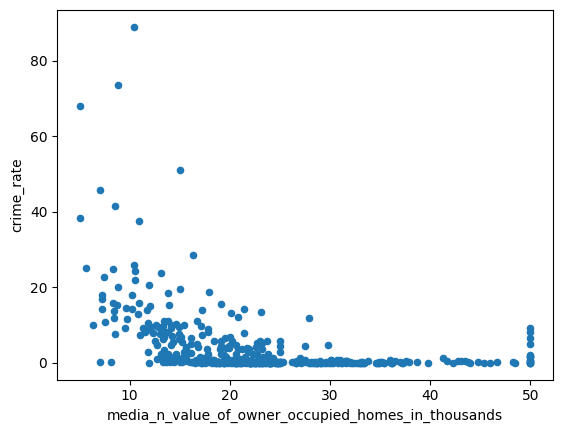

In [31]:
df_housing.plot.scatter(x='media_n_value_of_owner_occupied_homes_in_thousands', y='crime_rate')
plt.show()

- Barras: Un gráfico de barras es útil para comparar una variable
entre distintos grupos o categorías. Por ejemplo, si quisiéramos
observar el valor medio de cada ciudad. Para nuestro caso se
desea agrupar por ciudad y toma la media del valor mediano.
Gráfica las 10 primeras ciudades.

<AxesSubplot: >

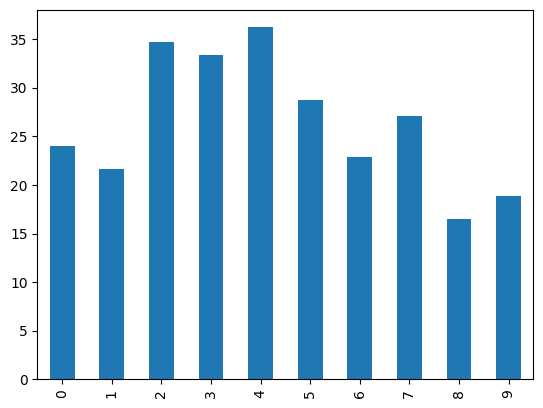

In [38]:
df_housing.head(10)["media_n_value_of_owner_occupied_homes_in_thousands"].plot.bar()

- Cajas: Los diagramas de cajas son útiles para representar grupos
de datos y compararlos entre ellos. Otro uso importante es que
nos permiten identificar de forma sencilla si una variable tiene
muchos outliers (valores atípicos) esto es, elementos que se
alejan de los valores frecuentes de dicha variable. Para nuestro
caso, se desea ver los valores atípicos de índice de crimen en los
diferentes cuantiles de valor mediano.

In [105]:
quantiles_media = df_housing["media_n_value_of_owner_occupied_homes_in_thousands"].quantile(q=[0, 0.25, 0.5, 0.75, 1])

In [108]:
mascara_quantile_25 =  (0 <= df_housing.media_n_value_of_owner_occupied_homes_in_thousands) &  (df_housing.media_n_value_of_owner_occupied_homes_in_thousands <= quantiles_media.values[1])
mascara_quantile_50 =  (quantiles_media.values[1] <= df_housing.media_n_value_of_owner_occupied_homes_in_thousands) &  (df_housing.media_n_value_of_owner_occupied_homes_in_thousands <= quantiles_media.values[2])
mascara_quantile_75 =  (quantiles_media.values[2] <= df_housing.media_n_value_of_owner_occupied_homes_in_thousands) &  (df_housing.media_n_value_of_owner_occupied_homes_in_thousands <= quantiles_media.values[3])
mascara_quantile_100 =  (quantiles_media.values[3] <= df_housing.media_n_value_of_owner_occupied_homes_in_thousands) &  (df_housing.media_n_value_of_owner_occupied_homes_in_thousands <= quantiles_media.values[4])

In [109]:
datos_0_25 = df_housing[mascara_quantile_25]
datos_25_50 = df_housing[mascara_quantile_50]
datos_50_75 = df_housing[mascara_quantile_75]
datos_75_100 = df_housing[mascara_quantile_100]

In [60]:
df_housing['crime_rate']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crime_rate, Length: 506, dtype: float64

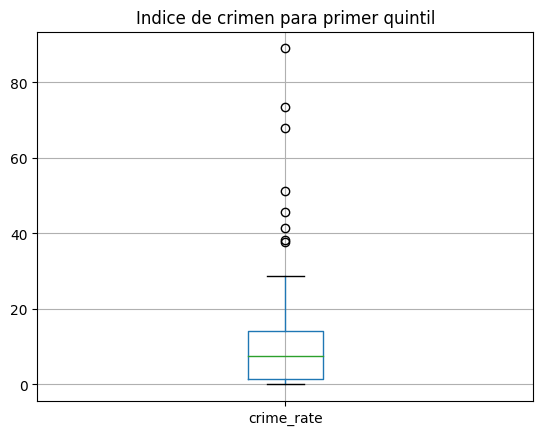

In [127]:
datos_0_25.boxplot(column=['crime_rate'])
plt.title("Indice de crimen para primer quintil")
plt.show()

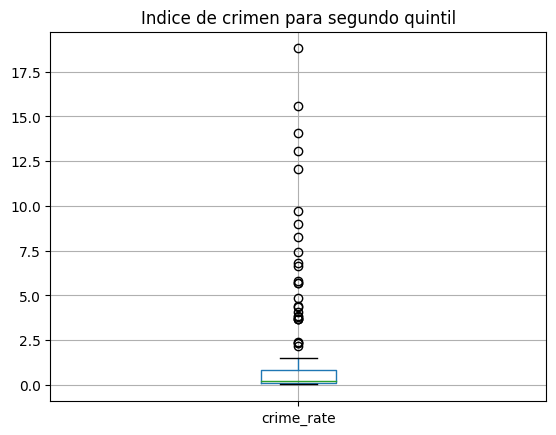

In [128]:
datos_25_50.boxplot(column=['crime_rate'])
plt.title("Indice de crimen para segundo quintil")
plt.show()

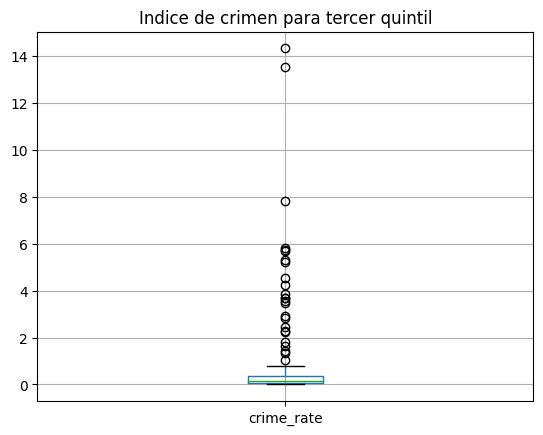

In [129]:
datos_50_75.boxplot(column=['crime_rate'])
plt.title("Indice de crimen para tercer quintil")
plt.show()

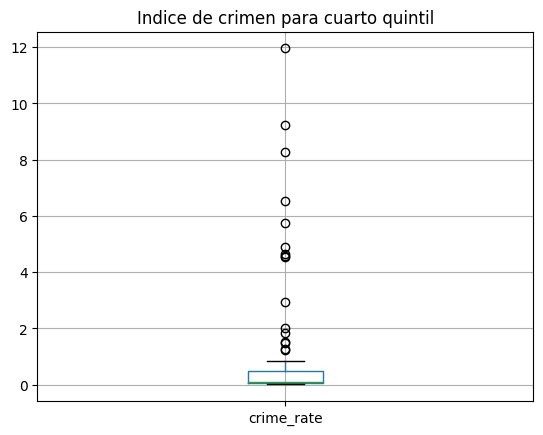

In [130]:
datos_75_100.boxplot(column=['crime_rate'])
plt.title("Indice de crimen para cuarto quintil")
plt.show()

**R: Para quintiles con valores de casas **

- Tipos de gráficos para la librería Matplotlib:

    **R:**